# Import libraries 

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Load dataset

In [2]:
X, y = load_breast_cancer(return_X_y = True)

# See labels for dataset

In [3]:
list(np.unique(y))

[0, 1]

# Checking how many samples are 0 (malignant) and 1 (benign)

In [4]:
print("Total samples:", len(y))
print("Samples classified as malignant (0):", len(y) - sum(y))
print("Samples classified as benign (1):", sum(y))

Total samples: 569
Samples classified as malignant (0): 212
Samples classified as benign (1): 357


# Split the data where 80% is used for training and 20% is used for testing

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2021)

# Instantiate model for classification (Logistic Regression)

In [6]:
clf = LogisticRegression(max_iter = 10000)

# Training the model on the train data

In [7]:
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

# Getting classification report

In [8]:
target_names = ["Class 0 (Malignant)", "Class 1 (Benign)"]

In [9]:
print(classification_report(y_test, clf.predict(X_test), target_names=target_names))

                     precision    recall  f1-score   support

Class 0 (Malignant)       0.95      0.88      0.91        42
   Class 1 (Benign)       0.93      0.97      0.95        72

           accuracy                           0.94       114
          macro avg       0.94      0.93      0.93       114
       weighted avg       0.94      0.94      0.94       114



# Plotting confusion matrix

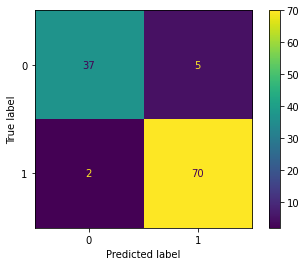

In [10]:
plot_confusion_matrix(clf, X_test, y_test)
plt.show();  

# Getting the components of the confusion matrix

In [11]:
tn, fp, fn, tp = confusion_matrix(y_test, clf.predict(X_test), labels=[0,1]).ravel()

# Accuracy

In [12]:
accuracy_manual = (tn + tp)/(tn + fp + fn + tp)
print("Accuracy:", accuracy_score(y_test, clf.predict(X_test)))
print("Accuracy from manual calculation:", accuracy_manual)

Accuracy: 0.9385964912280702
Accuracy from manual calculation: 0.9385964912280702


# Precision (for 1 as positive)

In [13]:
precision_manual = tp/(tp + fp)
print("Precision (for 1 as positive):", precision_score(y_test, clf.predict(X_test)))
print("Precision from manual calculation (for 1 as positive):", precision_manual)

Precision (for 1 as positive): 0.9333333333333333
Precision from manual calculation (for 1 as positive): 0.9333333333333333


# Recall (for 1 as positive)

In [14]:
recall_manual = tp/(tp + fn)
print("Recall (for 1 as positive):", recall_score(y_test, clf.predict(X_test)))
print("Recall from manual calculation (for 1 as positive):", recall_manual)

Recall (for 1 as positive): 0.9722222222222222
Recall from manual calculation (for 1 as positive): 0.9722222222222222


# F1 Score (for 1 as positive)

In [15]:
f1_score_manual = 2 * (precision_manual * recall_manual) / (precision_manual + recall_manual)
print("F1 Score (for 1 as positive):", f1_score(y_test, clf.predict(X_test)))
print("F1 Score from manual calculation (for 1 as positive):", f1_score_manual)

F1 Score (for 1 as positive): 0.9523809523809524
F1 Score from manual calculation (for 1 as positive): 0.9523809523809524


# Support (for 1 as positive)

In [16]:
support_manual = tp + fn
print("Support (for 1 as positive):", sum(y_test))
print("Support from manual calculation (for 1 as positive):", support_manual)

Support (for 1 as positive): 72
Support from manual calculation (for 1 as positive): 72
